In [29]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
def display_scrollable_df(df, max_rows=5, height=300):
    display(HTML(df.head(max_rows).to_html(max_rows=max_rows, max_cols=100, escape=False)))
    display(HTML(f"""<style>
        .output_scroll {{
            max-height: {height}px;
            overflow-y: auto;
        }}
    </style>"""))

In [12]:
# Load Dataset - World Stock Prices (Daily Updating)
world_path = r"C:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\World Stock Prices (Daily Updating)\World-Stock-Prices-Dataset.csv"

df = pd.read_csv(world_path)

print("World Stock Prices Dataset:")
display_scrollable_df(df)

World Stock Prices Dataset:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-05-30 00:00:00-04:00,7.020000,7.240000,6.920000,7.100000,12750600.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-05-30 00:00:00-04:00,102.639999,102.940002,100.790001,102.000000,1505500.0,0.0,0.0,crocs,CROX,footwear,usa,NaN
2,2025-05-30 00:00:00-04:00,71.610001,72.470001,71.610001,72.099998,28013500.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
3,2025-05-30 00:00:00-04:00,125.080002,126.190002,123.750000,124.510002,82500.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
4,2025-05-30 00:00:00-04:00,294.970001,295.750000,291.630005,294.049988,5251700.0,0.0,0.0,american express,AXP,finance,usa,NaN


In [13]:
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Dividends        float64
Stock Splits     float64
Brand_Name        object
Ticker            object
Industry_Tag      object
Country           object
Capital Gains    float64
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [15]:

df.dtypes

Date             datetime64[ns, UTC]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Dividends                    float64
Stock Splits                 float64
Brand_Name                    object
Ticker                        object
Industry_Tag                  object
Country                       object
Capital Gains                float64
dtype: object

In [16]:
df_filtered = df.copy()
df_filtered = df_filtered[df_filtered["Country"] == "usa"]
df_filtered = df_filtered.drop(['Brand_Name', 'Capital Gains', 'Country', 'Industry_Tag', 'Stock Splits', 'Dividends'], axis=1)
df_filtered.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,2025-05-30 04:00:00+00:00,7.020000,7.240000,6.920000,7.100000,12750600.0,PTON
1,2025-05-30 04:00:00+00:00,102.639999,102.940002,100.790001,102.000000,1505500.0,CROX
2,2025-05-30 04:00:00+00:00,71.610001,72.470001,71.610001,72.099998,28013500.0,KO
4,2025-05-30 04:00:00+00:00,294.970001,295.750000,291.630005,294.049988,5251700.0,AXP
6,2025-05-30 04:00:00+00:00,361.350006,367.040009,361.350006,365.190002,8726000.0,V


In [17]:
df_filtered.set_index('Date', inplace=True)
df_filtered.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2025-05-30 04:00:00+00:00,7.020000,7.240000,6.920000,7.100000,12750600.0,PTON
2025-05-30 04:00:00+00:00,102.639999,102.940002,100.790001,102.000000,1505500.0,CROX
2025-05-30 04:00:00+00:00,71.610001,72.470001,71.610001,72.099998,28013500.0,KO
2025-05-30 04:00:00+00:00,294.970001,295.750000,291.630005,294.049988,5251700.0,AXP
2025-05-30 04:00:00+00:00,361.350006,367.040009,361.350006,365.190002,8726000.0,V


In [18]:
df_filtered.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Ticker    0
dtype: int64

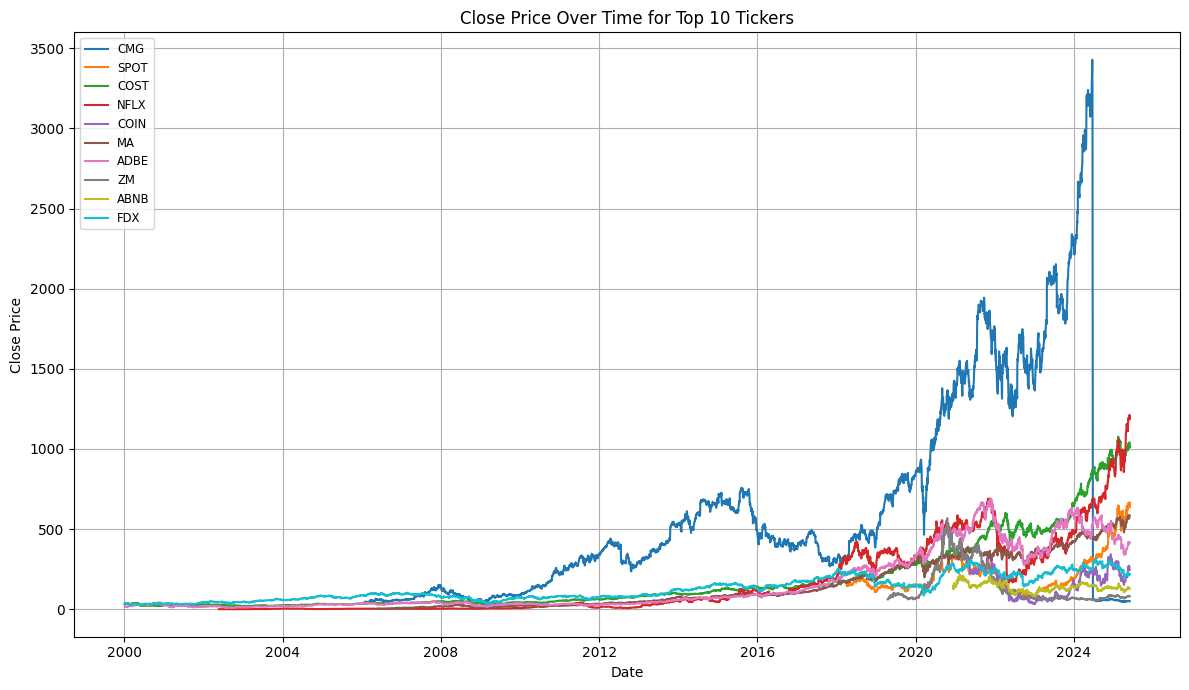

In [19]:

top_tickers = (
    df_filtered.groupby("Ticker")["Close"]
    .mean()
    .nlargest(10)
    .index
)

plt.figure(figsize=(12, 7))
for ticker in top_tickers:
    df_ticker = df_filtered[df_filtered["Ticker"] == ticker]
    plt.plot(df_ticker.index, df_ticker["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Close Price Over Time for Top 10 Tickers")
plt.legend(loc="upper left", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:

df_stock = df_filtered[df_filtered["Ticker"] == "NFLX"].copy()
df_stock = df_stock.sort_index()

In [21]:

df_stock.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2002-05-23 04:00:00+00:00,1.156429,1.242857,1.145714,1.196429,104790000.0,NFLX
2002-05-24 04:00:00+00:00,1.214286,1.225000,1.197143,1.210000,11104800.0,NFLX
2002-05-28 04:00:00+00:00,1.213571,1.232143,1.157143,1.157143,6609400.0,NFLX
2002-05-29 04:00:00+00:00,1.164286,1.164286,1.085714,1.103571,6757800.0,NFLX
2002-05-30 04:00:00+00:00,1.107857,1.107857,1.071429,1.071429,10154200.0,NFLX


In [22]:

df_fe = df_stock.copy()

df_fe['Close_lag_1'] = df_fe['Close'].shift(1)

df_fe['Return_1d'] = df_fe['Close'].pct_change()

df_fe['MA_5'] = df_fe['Close'].rolling(window=5).mean()
df_fe['MA_20'] = df_fe['Close'].rolling(window=20).mean()

df_fe['Volatility_10d'] = df_fe['Close'].rolling(window=10).std()

df_fe['Volume_MA_10'] = df_fe['Volume'].rolling(window=10).mean()
df_fe['Volume_Ratio'] = df_fe['Volume'] / df_fe['Volume_MA_10']

df_fe.dropna(inplace=True)
features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'Close_lag_1', 'Return_1d',
    'MA_5', 'MA_20',
    'Volatility_10d',
    'Volume_Ratio'
]

In [23]:

features = [
    'Open', 'High', 'Low', 'Close']
df_stock = df_fe[features]

In [24]:

train_size = int(len(df_stock) * 0.8)
df_train = df_stock.iloc[:train_size]
df_test = df_stock.iloc[train_size:]

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train)

In [30]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length, features.index('Close')]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 20
X_train, y_train = create_sequences(scaled_train, seq_length)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

In [31]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel(input_size=len(features), hidden_size=128)
     

In [32]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.0682
Epoch 10, Loss: 0.0137
Epoch 20, Loss: 0.0017
Epoch 30, Loss: 0.0013
Epoch 40, Loss: 0.0008


In [33]:

scaled_test = scaler.transform(df_test[features])
input_seq = scaled_train[-seq_length:].copy()
future_preds = []

for i in range(len(df_test)):
    input_tensor = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        next_scaled = model(input_tensor).item()

    actual_next_row = scaled_test[i].copy()
    actual_next_row[features.index('Close')] = next_scaled

    future_preds.append(actual_next_row.copy())
    input_seq = np.vstack([input_seq[1:], actual_next_row])


In [34]:
pred_arr = np.array(future_preds).reshape(-1, len(features))
predicted_closes = scaler.inverse_transform(pred_arr)[:, features.index('Close')]


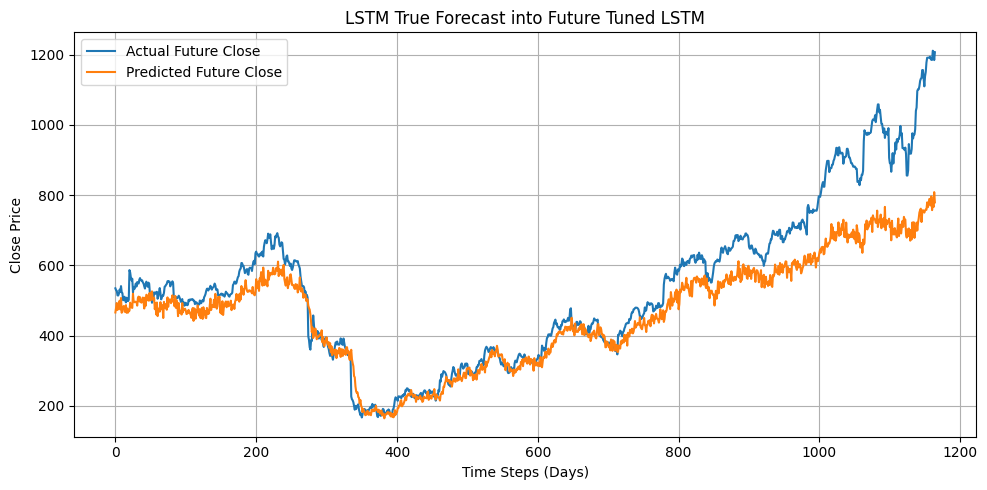

In [35]:
actual_closes = df_test['Close'].values

plt.figure(figsize=(10, 5))
plt.plot(actual_closes, label='Actual Future Close')
plt.plot(predicted_closes, label='Predicted Future Close')
plt.title("LSTM True Forecast into Future Tuned LSTM")
plt.xlabel("Time Steps (Days)")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Evaluate the model using Mean Absolute Error (MAE) and Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(actual_closes, predicted_closes)  
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 74.9070
Root Mean Squared Error (RMSE): 114.0841


Linear Regression Model